<a href="https://colab.research.google.com/github/PashaIanko/Kaggle.Restaurant-Revenue-Prediction/blob/main/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Set up paths

In [90]:
drive.mount('/content/gdrive')
gdrive_path = '/content/gdrive/MyDrive/'
df_path = 'ML/Datasets/5.RestaurantRevenue/'

train_path = gdrive_path + df_path + "train.csv"
train_processed_path = gdrive_path + df_path + "trainval_processed.csv"
test_processed_path = gdrive_path + df_path + "test_processed.csv" 

test_for_submission_path =  gdrive_path + df_path + "test.csv"
test_for_submission_processed_path = gdrive_path + df_path + "test_processed.csv"


submission_path = gdrive_path + df_path + "submission.csv"
sample_submission_path = gdrive_path + df_path + "sampleSubmission.csv"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 1. Frame the problem

- **Type of task?**
    - Supervised / Unsupervised / Reinforcement?
        - Supervised
    - Classification / Regression / Clustering / Novelty search?
        - Regression (univariate, multiple regression)
    - Batch learning / Online learning?
        - Batch learning

- **How company will benefit from task?**
    - **Predicting revenue (money) of a restaurang, to justify investment in building a new one in a given area**

- **Algorithms?**
    - SGD regressor, SVM, Random forest, FFNN, KNN regressor

- **Performance measure?**
    - RMSE
    - MAE if many outliers

- **What the current solution looks like?**
    - Human analysis



# 2. Check assumptions

- No serious assumptions. This competition needs indeed a regression output (values), but not categories or classes.

# 3. Download the data

In [84]:
train_df = pd.read_csv(train_path, index_col='Id')
test_df = pd.read_csv(test_for_submission_path, index_col='Id')

# 4. Quick look at data structure

- Outliers and skew in the target variable (revenue)
- Approximately same range of numerical features
- No missing values

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 136
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open Date   137 non-null    object 
 1   City        137 non-null    object 
 2   City Group  137 non-null    object 
 3   Type        137 non-null    object 
 4   P1          137 non-null    int64  
 5   P2          137 non-null    float64
 6   P3          137 non-null    float64
 7   P4          137 non-null    float64
 8   P5          137 non-null    int64  
 9   P6          137 non-null    int64  
 10  P7          137 non-null    int64  
 11  P8          137 non-null    int64  
 12  P9          137 non-null    int64  
 13  P10         137 non-null    int64  
 14  P11         137 non-null    int64  
 15  P12         137 non-null    int64  
 16  P13         137 non-null    float64
 17  P14         137 non-null    int64  
 18  P15         137 non-null    int64  
 19  P16         137 non-null    i

In [ ]:
train_df.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


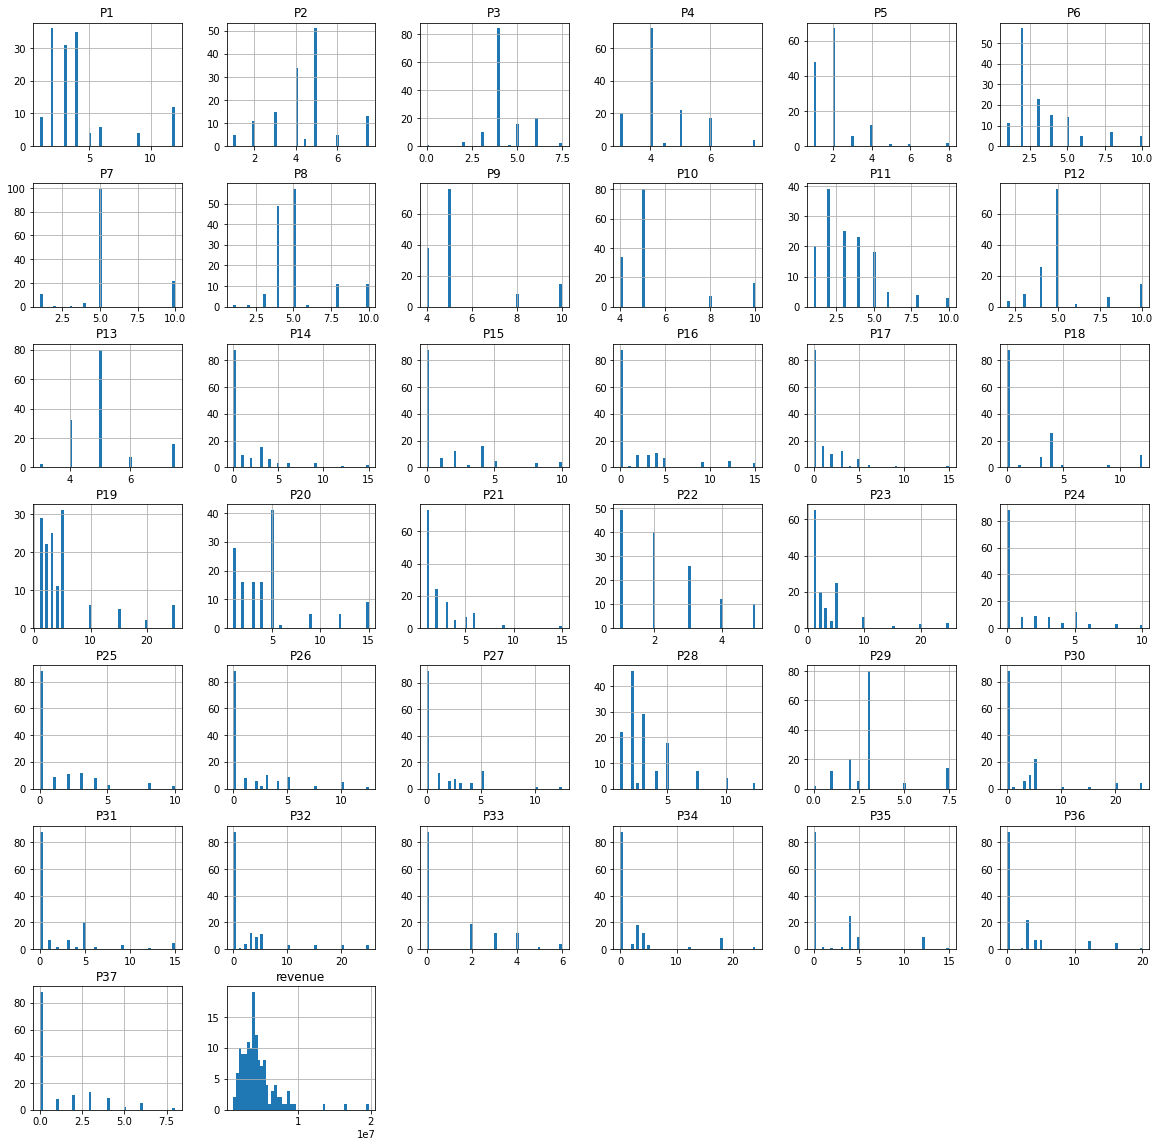

In [ ]:
_ = train_df.hist(bins=50, figsize = (20, 20))

# 5. Create test + trainval sets (remember stratified sampling)

In [5]:
TEST_PERCENTAGE = 0.15
RANDOM_STATE = 42


train_val, test = train_test_split(
    train_df,
    test_size = TEST_PERCENTAGE,
    random_state = RANDOM_STATE,
    # stratify = train_df['revenue'].values
)

Text(0, 0.5, 'Percentage')

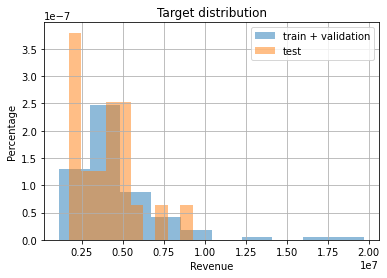

In [6]:
fig, ax = plt.subplots()

ax.hist(train_val['revenue'], density=True, alpha=0.5)
ax.hist(test['revenue'], density=True, alpha=0.5)

ax.legend(['train + validation', 'test'])
ax.grid()
ax.set_title('Target distribution')
ax.set_xlabel('Revenue')
ax.set_ylabel('Percentage')

# 6. Data exploration (on trainval set)

- Heavy tail - might log-transform the data. Because many algorithms fail to detect patterns for data with heavy tails
- P28, P6, P17 - log transform
- Big cities contribute to larger revenue (City Group feature). Apply cat encoding, to enforce order
- One hot encoding for the restaurant type. We will not inflate the the dataset, as there are only 4 types of categories
- The majority of restaurants opened after 2007 (skewed). There is an upward trend - the later a restaurant is opened, the more revenue it gives. Replace text feature "Opening date" with numeric feature - year of opening
- Strong correlation with a new feature - population of the city

## 6.1. Sample an exploration set

- Not necessary, dataset is of low size
- **At this step - make a copy of dataset for experiments (for safety)**

In [ ]:
exploration_df = train_val.copy()

## 6.2. Visualizations

### 6.2.1. Target variable

(None, None)

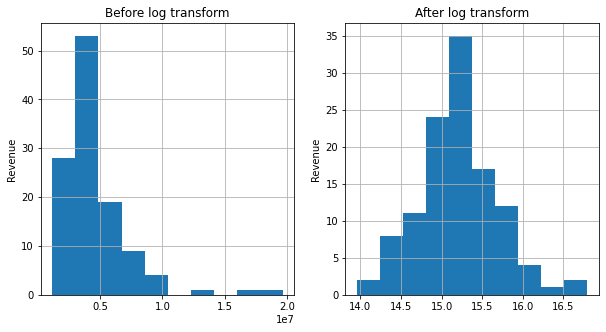

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

ax[0].hist(exploration_df['revenue'])
ax[0].set_title('Before log transform')
ax[0].set_ylabel('Revenue')

ax[1].hist(np.log(exploration_df['revenue']))
ax[1].set_title('After log transform')
ax[1].set_ylabel('Revenue')

ax[0].grid(), ax[1].grid()

### 6.2.3. Revenue by city

In [ ]:
def boxplot_regression(df_, cat_feature_, target_feature_):
    subset = df_[[cat_feature_, target_feature_]]
    s = subset.groupby([cat_feature_]).median().sort_values(by=target_feature_)
    
    fig = plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(x=cat_feature_, data=df_, stat='percent')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=cat_feature_, y=target_feature_, data=df_, order=s.index)

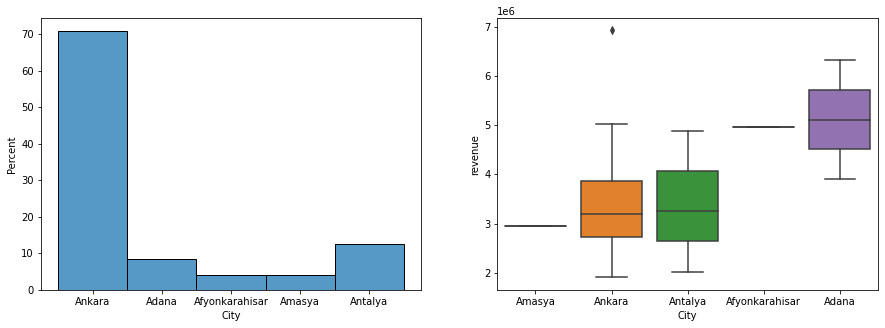

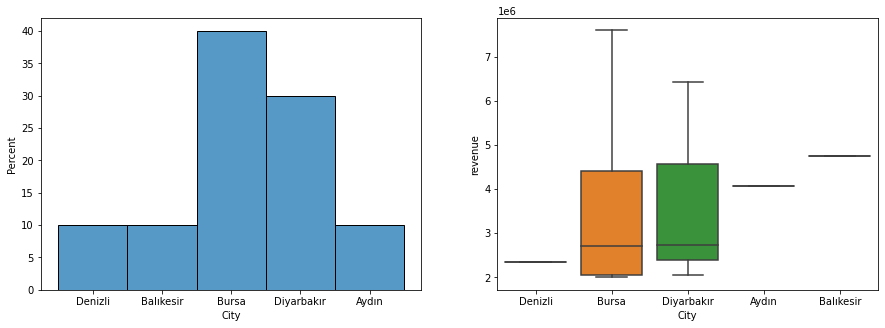

In [ ]:
counter = 0
available_cities = np.unique(exploration_df['City'])

boxplot_regression(
    df_=exploration_df.loc[np.isin(exploration_df['City'], available_cities[0:5]), :],
    cat_feature_='City',
    target_feature_='revenue'
)

boxplot_regression(
    df_=exploration_df.loc[np.isin(exploration_df['City'], available_cities[5:10]), :],
    cat_feature_='City',
    target_feature_='revenue'
)

### 6.2.3. Restaurant type

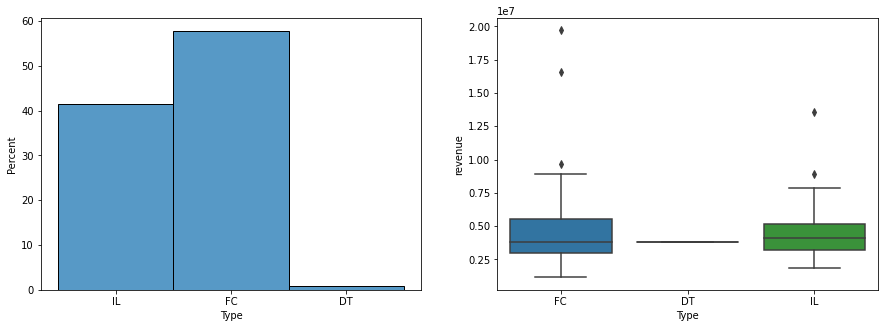

In [ ]:
exploration_df['Type'].value_counts()
boxplot_regression(
    df_=exploration_df, 
    cat_feature_='Type', 
    target_feature_='revenue'
)

### 6.2.3. City type

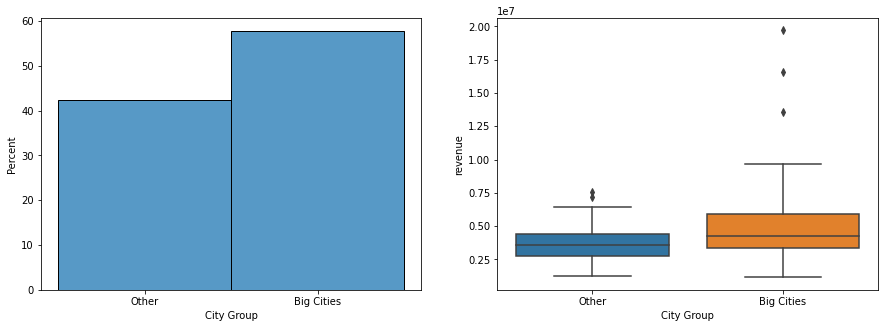

In [ ]:
boxplot_regression(exploration_df, 'City Group', 'revenue')

## 6.3. Correlations & scatter matrix

In [ ]:
def get_correlations(df_, target_feature_, ascending_=False):
    cm = df_.corr()
    return cm[target_feature_].sort_values(ascending=ascending_)

def get_correlated_attributes(df_, target_feature_, corr_threshold_):
    '''
    Selects features, that have correlated coeff "C", such that
    |C| > |corr_threshold_|
    '''
    corrs = get_correlations(df_, target_feature_)
    return corrs.loc[
        (corrs >= abs(corr_threshold_)) |
        (corrs <= -abs(corr_threshold_))
    ]


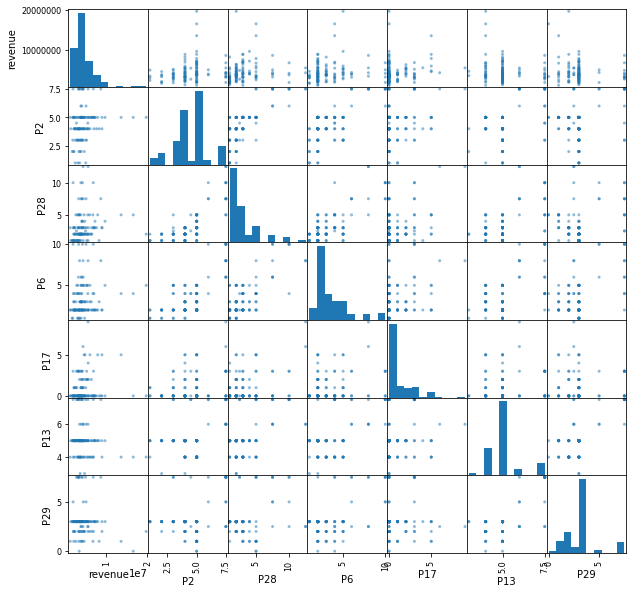

In [ ]:
attributes = get_correlated_attributes(exploration_df, 'revenue', 0.12).index
_ = scatter_matrix(exploration_df[attributes], figsize=(10, 10))

## 6.4. Experiment with attribute combinations

- Not a lot of attributes to combine (unline Housing prices tasks, here we cannot combint P-features). I focus on feature engineering component

## 6.5. Feature engineering

### 6.5.1. Year of opening

In [ ]:
dates = exploration_df['Open Date'].values
years = [int(date.split('/')[-1]) for date in dates]
years[:5]

[2009, 2007, 2008, 2009, 2007]

In [ ]:
exploration_df['open_year'] = years

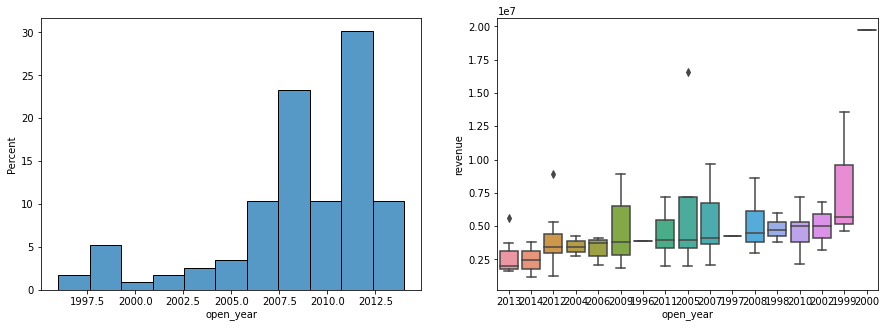

In [ ]:
boxplot_regression(exploration_df, 'open_year', 'revenue')

### 6.5.2. Population

In [ ]:
def write_population(city):
    populations = {
        'Gaziantep' : 2069000,
        'Ankara'    : 5663000,
        'İstanbul'  : 15460000,
        'İzmir'  : 4367000,
        'Kocaeli'  : 2033441,
        'Osmaniye'  : 219339,
        'Kastamonu'  : 128537,
        'Eskişehir'  : 887475,
        'Denizli'  : 1028000,
        'Balıkesir'  : 1229000,
        'Sakarya'  : 567000,
        'Tekirdağ'  : 204001,
        'Bursa'  : 2055000,
        'Kayseri'  : 1062000,
        'Muğla'  : 1000773,
        'Edirne'  : 165979,
        'Samsun'  : 605319,
        'Karabük'  : 248014,
        'Adana'  : 1769000,
        'Afyonkarahisar'  : 744179,
        'Tokat'  : 612646,
        'Amasya'  : 91874,
        'Diyarbakır'   : 1783000,
        'Kütahya'  : 248054,
        'Antalya'   : 1319000,
        'Aydın'   : 1134031,
        'Şanlıurfa'  : 2031000,
        'Kırklareli'  : 88956,
        'Isparta'   : 198385,
        'Uşak'  :  500000,
        'Elazığ'  : 541258
    }
    
    
    assert city in populations.keys()
    return populations[city]

exploration_df['population'] = exploration_df['City'].apply(lambda row: write_population(row))

In [ ]:
get_correlated_attributes(exploration_df, 'revenue', 0.12)

revenue       1.000000
population    0.363098
P2            0.191189
P28           0.150818
P6            0.136381
P17           0.133384
P13          -0.126957
P29          -0.127254
open_year    -0.318152
Name: revenue, dtype: float64

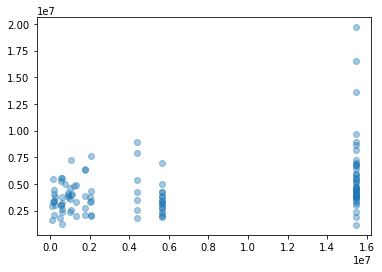

In [ ]:
_, ax = plt.subplots()
ax.scatter(
    x=exploration_df['population'],
    y=exploration_df['revenue'], 
    alpha = 0.4
)

# 7. Data preparation

## Check missing and infinite values

In [7]:
def nan_percentage(df, colname):
    return (df[colname].isnull().sum() / df.shape[0]) * 100

def nan_statistics(df, nan_thresh=0.0):
    res = {}
    nan_cols = df.loc[:, df.isna().any()].columns
    for col in nan_cols:
        res[col] = nan_percentage(df, col)
    print(f'Col -- Nan percentage')
    for key, val in sorted(res.items(), key=lambda item: item[1], reverse=True):
        if val >= nan_thresh * 100:
            print(key, val)
        else:
            del res[key]
    return res

In [8]:
nan_statistics(train_val), nan_statistics(test)

Col -- Nan percentage
Col -- Nan percentage


({}, {})

## Text and categorical attributes

In [9]:
def get_categorical_columns(df_):
    return df_.dtypes[df_.dtypes == 'object']

cat_columns = get_categorical_columns(train_val)
cat_columns

Open Date     object
City          object
City Group    object
Type          object
dtype: object

In [ ]:
train_val['City Group'].value_counts()

Big Cities    67
Other         49
Name: City Group, dtype: int64

### City Group


In [10]:
# Apply ordinal encoding. 
# Such that big cities were ranked higher, than other
# areas.

from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(categories = [['Other', 'Big Cities']])
enc.fit(train_val[['City Group']])

OrdinalEncoder(categories=[['Other', 'Big Cities']])

### Type (of restaurant)

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
one_hot_enc = OneHotEncoder()
one_hot_enc.fit(train_val[['Type']])

OneHotEncoder()

In [13]:
res = one_hot_enc.transform(train_val[['Type']])
res

<116x3 sparse matrix of type '<class 'numpy.float64'>'
	with 116 stored elements in Compressed Sparse Row format>

### City 

- Dropping that column

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin

class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        super().__init__()
        self.columns_to_drop = columns_to_drop
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        for c in self.columns_to_drop:
            assert c in X.columns
        print(f'Dropping')
        print(X.shape)
        transformed_df = X.drop(labels=self.columns_to_drop, axis='columns', inplace=False)
        print(transformed_df.shape)
        return transformed_df

In [15]:
dropper = ColumnDropper(
    columns_to_drop = ['City']
)
res = dropper.fit_transform(train_val)
assert not 'City' in res.columns
assert 'City' in train_val.columns

Dropping
(116, 42)
(116, 41)


### Open date

- Transform into numerical feature (year of opening)

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin

class DateTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()
        self._column_index = 0 # column_index
    
    def fit(self, X, y=None):
        return self
    
    def get_year(self, date_):
        return int(date_.split('/')[-1])
    
    def transform(self, X, y=None):
        print('here')
        print(type(X))
        dates = X.loc[:, 'Open Date'].values
        print(dates[0])
        numeric_years = list(map(self.get_year, dates))
        
        res_df = X.copy()
        res_df['Open Date'] = numeric_years
        # X[:, self._column_index] = res
        return res_df

In [17]:
date_transformer = DateTransformer()

In [18]:
res = date_transformer.fit_transform(train_val)

here
<class 'pandas.core.frame.DataFrame'>
05/09/2009


## Creating pipeline

In [19]:
# target
target_feature = ['revenue']

# numerical
num_features = train_val.dtypes[
    train_val.dtypes != 'object'
]
num_features.drop('revenue', inplace=True)
num_features = list(num_features.index)

# categorical
cat_features = list(
    train_val.dtypes[
        train_val.dtypes == 'object'
    ].index
)

In [20]:
print(num_features)
print(cat_features)
print(target_feature)

['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37']
['Open Date', 'City', 'City Group', 'Type']
['revenue']


In [21]:
from sklearn.base import BaseEstimator, TransformerMixin

class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        super().__init__()
        self.columns = columns
        self.offset = 1.0
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        transformed = X.copy()
        for c in self.columns:
            assert c in transformed.columns
            transformed[c] = np.log(transformed[c] + self.offset)
        return transformed

In [67]:
from sklearn.base import TransformerMixin, BaseEstimator

class PopulationAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()

    def fit(self, X, y=None):
        return self

    def write_population(self, city):
        populations = {
            'Gaziantep' : 2069000,
            'Ankara'    : 5663000,
            'İstanbul'  : 15460000,
            'İzmir'  : 4367000,
            'Kocaeli'  : 2033441,
            'Osmaniye'  : 219339,
            'Kastamonu'  : 128537,
            'Eskişehir'  : 887475,
            'Denizli'  : 1028000,
            'Balıkesir'  : 1229000,
            'Sakarya'  : 567000,
            'Tekirdağ'  : 204001,
            'Bursa'  : 2055000,
            'Kayseri'  : 1062000,
            'Muğla'  : 1000773,
            'Edirne'  : 165979,
            'Samsun'  : 605319,
            'Karabük'  : 248014,
            'Adana'  : 1769000,
            'Afyonkarahisar'  : 744179,
            'Tokat'  : 612646,
            'Amasya'  : 91874,
            'Diyarbakır'   : 1783000,
            'Kütahya'  : 248054,
            'Antalya'   : 1319000,
            'Aydın'   : 1134031,
            'Şanlıurfa'  : 2031000,
            'Kırklareli'  : 88956,
            'Isparta'   : 198385,
            'Uşak'  :  500000,
            'Elazığ'  : 541258,
            'Bolu': 131264,
            'Konya': 2161000,
            'Trabzon': 312060,
            'Niğde': 341412,
            'Aksaray': 416317,
            'Artvin': 25771,
            'Batman': 348963,
            'Bilecik': 64531,
            'Düzce': 135557,
            'Erzincan': 236034,
            'Erzurum': 767848,
            'Giresun': 100712,
            'Hatay': 1670712,
            'Kahramanmaraş': 547000,
            'Kars': 78100,
            'Kırıkkale': 192473,
            'Kırşehir': 114244,
            'Malatya': 512000,
            'Manisa': 356702,
            'Mardin': 809719,
            'Mersin': 955106,
            'Nevşehir': 303010,
            'Ordu': 229214,
            'Rize': 344359,
            'Siirt': 135350,
            'Sivas': 359219,
            'Tanımsız': 500000, # ??? not in google
            'Yalova': 121479,
            'Zonguldak': 213544,
            'Çanakkale': 328736,
            'Çankırı': 216362,
            'Çorum': 237000
        }
            
            
        assert city in populations.keys(), print(city)
        return populations[city] / 1000000

    def transform(self, X, y=None):
        transformed_df = X.copy()
        transformed_df['population_million'] = X['City'].apply(
            lambda row: self.write_population(row)
        )
        return transformed_df

In [68]:
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

open_date_pipeline = Pipeline([
    ('dates', DateTransformer())  # to numeric years
])

restaurant_type_pipeline = Pipeline([
    ('one-hot', OneHotEncoder(handle_unknown='ignore'))
])

city_group_pipeline = Pipeline([
    ('ordinal', OrdinalEncoder(categories = [['Other', 'Big Cities']]))
])

city_pipeline = Pipeline([
    ('add-population', PopulationAdder()),
    ('delete', ColumnDropper(columns_to_drop = ['City']))
])

target_pipeline = Pipeline([
    ('log', LogTransformer(columns = target_feature))
])

In [69]:
train_val.columns

Index(['Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'revenue'],
      dtype='object')

In [70]:
preprocessor = ColumnTransformer(
    [
        ('num', num_pipeline, num_features),
        ('open-date', open_date_pipeline, ['Open Date']),
        ('city-group', city_group_pipeline, ['City Group']),
        ('restaurant-type', restaurant_type_pipeline, ['Type']),
        ('delete-columns', city_pipeline, ['City']),
        ('target-log', target_pipeline, target_feature)
    ], 
    remainder='drop'
)

In [85]:
# These are the subsets of the training set
trainval_prepared = preprocessor.fit_transform(train_val)
test_prepared = preprocessor.transform(test)

here
<class 'pandas.core.frame.DataFrame'>
05/09/2009
Dropping
(116, 2)
(116, 1)
here
<class 'pandas.core.frame.DataFrame'>
03/15/2008
Dropping
(21, 2)
(21, 1)


In [87]:
# This is the kaggle test set
test_df['revenue'] = np.ones(test_df.shape[0]) # to avoid bug. because no such column
test_for_submission_prepared = preprocessor.transform(
    test_df
)

here
<class 'pandas.core.frame.DataFrame'>
01/22/2011
Dropping
(100000, 2)
(100000, 1)


# Saving data

In [88]:
def save_data(array_, path_):
    df = pd.DataFrame(array_)
    df.to_csv(path_)

In [91]:
save_data(trainval_prepared, train_processed_path)
save_data(test_prepared, test_processed_path)
save_data(test_for_submission_prepared, test_for_submission_processed_path)

In [93]:
to_ = 5
print(trainval_prepared[0, :to_])
print(test_prepared[0, :to_])
print(test_for_submission_prepared[0, :to_])

[-0.33423578 -0.28596405 -1.22519289 -0.38332525  0.01416056]
[-1.03281868 -1.65387455  0.68891318 -1.38255511 -0.80715171]
[-1.03281868 -0.28596405 -0.26813986 -0.38332525 -0.80715171]


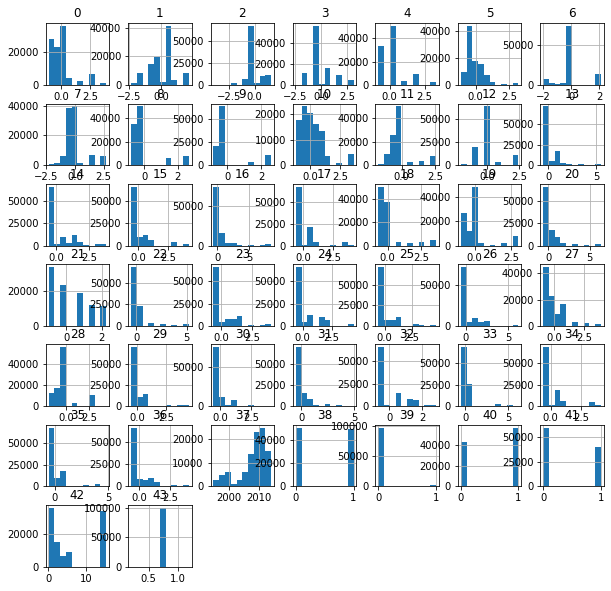

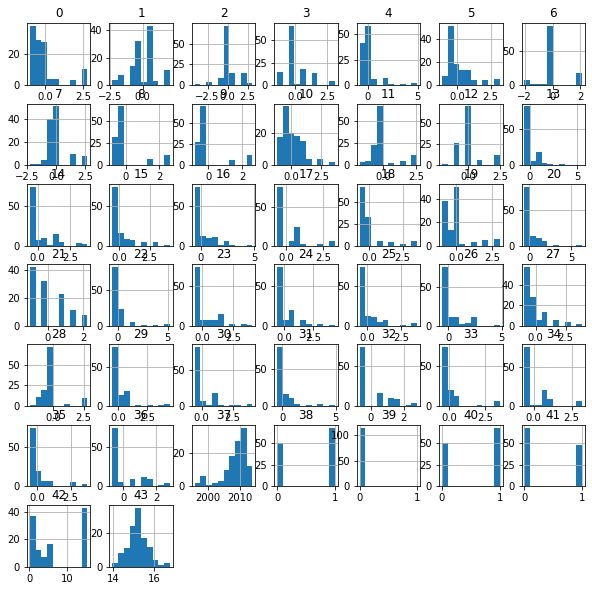

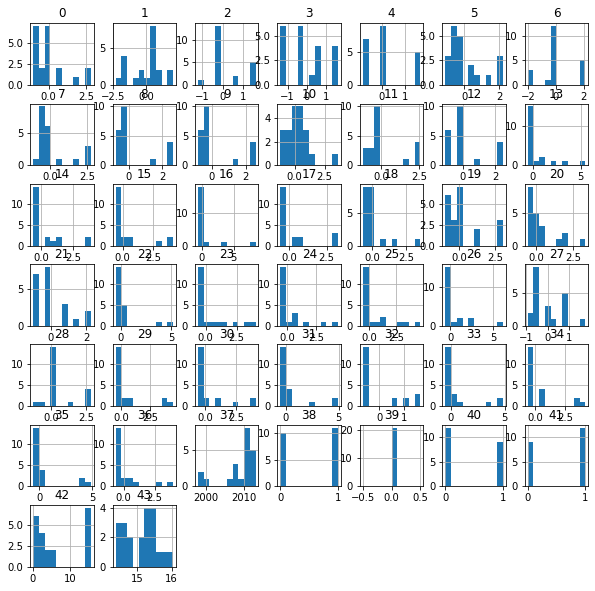

In [94]:
df = pd.DataFrame(test_for_submission_prepared)
_ = df.hist(figsize=(10, 10))

df = pd.DataFrame(trainval_prepared)
_ = df.hist(figsize=(10, 10))

df = pd.DataFrame(test_prepared)
_ = df.hist(figsize=(10, 10))

In [96]:
test_for_submission_prepared.dtype

dtype('float64')